In [8]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os



In [9]:

from google.colab import files
uploaded = files.upload()

Saving once.txt to once.txt


In [10]:

file = open("once.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]
len(data)

2088

In [11]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]
len(sequence_data)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])
y = to_categorical(y, num_classes=vocab_size)
y[:5]

172
The Length of sequences are:  366
Data:  [[ 1  9  3]
 [ 9  3 14]
 [ 3 14 28]
 [14 28 45]
 [28 45  4]
 [45  4 46]
 [ 4 46  5]
 [46  5  4]
 [ 5  4 17]
 [ 4 17 15]]
Response:  [14 28 45  4 46  5  4 17 15 47]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [12]:

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             1720      
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 172)               172172    
                                                                 
Total params: 13222892 (50.44 MB)
Trainable params: 13222892 (50.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


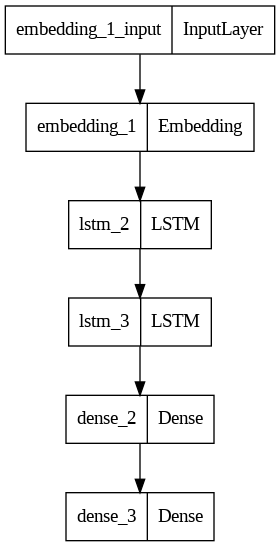

In [13]:

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='plot.png', show_layer_names=True)


In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])


Epoch 1/70
6/6 [==============================] - ETA: 0s - loss: 5.1364
Epoch 1: loss improved from inf to 5.13640, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 13s 2s/step - loss: 5.1364
Epoch 2/70
6/6 [==============================] - ETA: 0s - loss: 4.9160
Epoch 2: loss improved from 5.13640 to 4.91601, saving model to next_words.h5
6/6 [==============================] - 4s 582ms/step - loss: 4.9160
Epoch 3/70
6/6 [==============================] - ETA: 0s - loss: 4.7058
Epoch 3: loss improved from 4.91601 to 4.70582, saving model to next_words.h5
6/6 [==============================] - 3s 586ms/step - loss: 4.7058
Epoch 4/70
6/6 [==============================] - ETA: 0s - loss: 4.6454
Epoch 4: loss improved from 4.70582 to 4.64543, saving model to next_words.h5
6/6 [==============================] - 5s 782ms/step - loss: 4.6454
Epoch 5/70
6/6 [==============================] - ETA: 0s - loss: 4.6213
Epoch 5: loss improved from 4.64543 to 4.62133, saving model to next_words.h5
6/6 [==============================] - 3s 593ms/step - loss: 4.6213
Epoch 6/70
6/6 [==============================] - ETA: 0s 

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: Once upon a time
['upon', 'a', 'time']
1/1 [==============================] - 1s 947ms/step
in
Enter your line: howled and rain that pounded against the earth
['against', 'the', 'earth']
1/1 [==============================] - 0s 66ms/step
the
Enter your line: As the storm raged on, Maple sheltered the other
['sheltered', 'the', 'other']
1/1 [==============================] - 0s 44ms/step
trees
Enter your line: a testament to the power of
['the', 'power', 'of']
1/1 [==============================] - 0s 43ms/step
perseverance
